
🔍 Random Forest Evaluation:
AUC: 0.8235480062123669
              precision    recall  f1-score   support

         0.0       0.95      0.96      0.95     27995
         1.0       0.36      0.34      0.35      2005

    accuracy                           0.92     30000
   macro avg       0.66      0.65      0.65     30000
weighted avg       0.91      0.92      0.91     30000



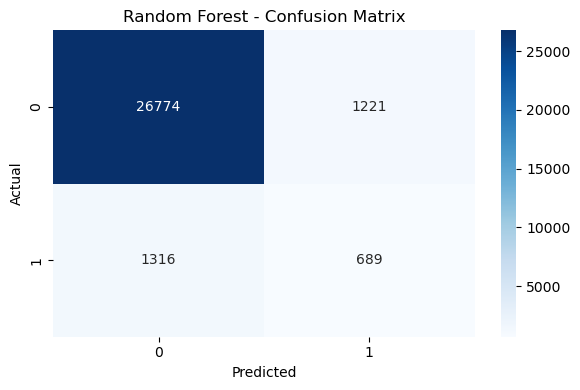

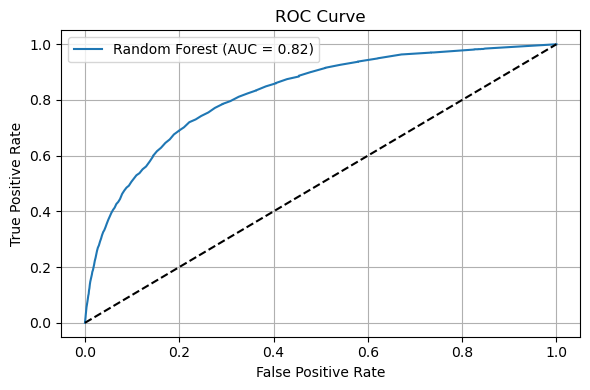

In [3]:
# --------------------------------------------
# Step 1: Imports
# --------------------------------------------
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from imblearn.over_sampling import SMOTE
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve
import matplotlib.pyplot as plt
import seaborn as sns

# Plot inline (important for Jupyter)
%matplotlib inline

# --------------------------------------------
# Step 2: Load Dataset
# --------------------------------------------
data_path = r"C:\Users\LENOVO\Downloads\cs-training.csv"
df = pd.read_csv(data_path, index_col=0)

# --------------------------------------------
# Step 3: Preprocessing
# --------------------------------------------
df['MonthlyIncome'] = df['MonthlyIncome'].clip(lower=0)
df['NumberOfDependents'] = df['NumberOfDependents'].clip(lower=0)

imputer = SimpleImputer(strategy='median')
df_imputed = pd.DataFrame(imputer.fit_transform(df), columns=df.columns)

X = df_imputed.drop(columns=['SeriousDlqin2yrs'])
y = df_imputed['SeriousDlqin2yrs']

# --------------------------------------------
# Step 4: Train-Test Split
# --------------------------------------------
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42
)

# --------------------------------------------
# Step 5: Feature Scaling
# --------------------------------------------
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# --------------------------------------------
# Step 6: SMOTE
# --------------------------------------------
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X_train_scaled, y_train)

# --------------------------------------------
# Step 7: Train and Evaluate Random Forest
# --------------------------------------------
def train_and_evaluate(model, model_name):
    model.fit(X_resampled, y_resampled)
    y_pred = model.predict(X_test_scaled)
    y_proba = model.predict_proba(X_test_scaled)[:, 1]

    print(f"\n🔍 {model_name} Evaluation:")
    print("AUC:", roc_auc_score(y_test, y_proba))
    print(classification_report(y_test, y_pred))

    # Confusion matrix
    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.title(f"{model_name} - Confusion Matrix")
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.tight_layout()
    plt.show()

    # ROC Curve
    fpr, tpr, _ = roc_curve(y_test, y_proba)
    plt.figure(figsize=(6, 4))
    plt.plot(fpr, tpr, label=f"{model_name} (AUC = {roc_auc_score(y_test, y_proba):.2f})")
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")
    plt.title("ROC Curve")
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()

# Train only Random Forest
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
train_and_evaluate(rf_model, "Random Forest")
